# DAAA-1B07 P2222840 Denzel See PDAS CA2

# Problem statement

In [ ]:
#1. To find out the change in the weather of Singapore
#2. To find out the chagne in PSI and whether it is affected by rain

# Datasets

In [33]:
import pandas as pd
datar = pd.read_csv("PDASdata/rainfall-monthly-total.csv")
datat = pd.read_csv("PDASdata/surface-air-temperature-monthly-mean.csv")
datap = pd.read_csv("PDASdata/historical-24-hr-psi.csv")

       month  total_rainfall
0    1982-01           107.1
1    1982-02            27.8
2    1982-03           160.8
3    1982-04           157.0
4    1982-05           102.2
..       ...             ...
487  2022-08           141.4
488  2022-09           121.0
489  2022-10           279.0
490  2022-11           313.8
491  2022-12           215.4

[492 rows x 2 columns]


# 1. To find out the change in the weather of Singapore (Part 1/2)
#  Data description, wrangling, analysis
#  Dataset : rainfall-monthly-total

Summary of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 360 to 491
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           130 non-null    object 
 1   total_rainfall  130 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
None

Before cleaning:
Data span from the year 1982-01 to year 2022-12

Total rainfall summary:
Mean:158.31
Median:143.80
Q1:89.20
Q3:211.70
Minimum:0.20
Maximum:395.20
Standard deviation:87.65

Null values:
month             0
total_rainfall    0
dtype: int64


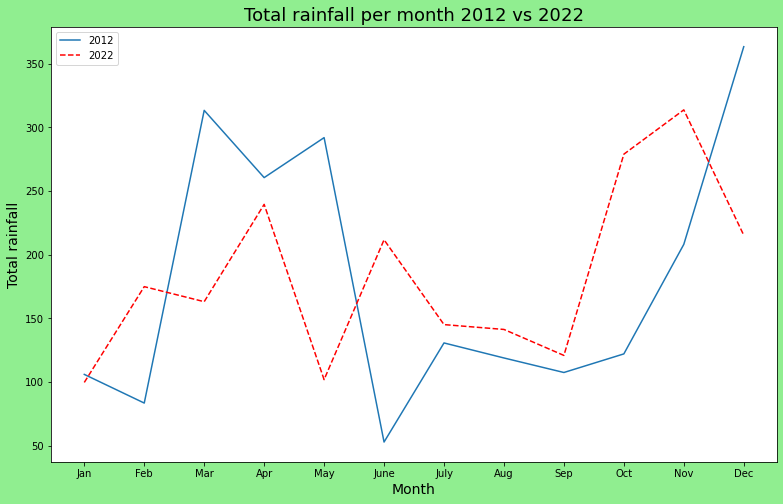

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# summary of data
datarsum = pd.read_csv("PDASdata/rainfall-monthly-total.csv") #Just for summary
print("Summary of dataset\n")
print(f"{datar.info()}")
print(f"\nBefore cleaning:\nData span from the year {datarsum['month'][0]} to year {datarsum.iloc[-1]['month']}")
print(f"\nTotal rainfall summary:\nMean:{datar['total_rainfall'].mean():.2f}\
\nMedian:{datar['total_rainfall'].median():.2f}\nQ1:{datar['total_rainfall'].quantile(0.25):.2f}\
\nQ3:{datar['total_rainfall'].quantile(0.75):.2f}\nMinimum:{datar['total_rainfall'].min():.2f}\
\nMaximum:{datar['total_rainfall'].max():.2f}\nStandard deviation:{datar['total_rainfall'].std():.2f}")
print(f"\nNull values:\n{datar.isnull().sum()}")


# cleaning the data
datar.drop(datar[(datar['month'] <='2012')].index, inplace=True)
IQR = datar['total_rainfall'].quantile(0.75)-datar['total_rainfall'].quantile(0.25)
Q3 = datar['total_rainfall'].quantile(0.75)
datar = datar[datar['total_rainfall'] < Q3+1.5*IQR]
datar.to_csv("rainfall-cleaned.csv",index=False)

# filtering the cleaned data
datacleanedr = pd.read_csv("rainfall-cleaned.csv")

end_date2012 = '2012-12-31'
datacleanedr2012 = datacleanedr.query('month<= @end_date2012')
start_date2022 = '2021-12-01'
datacleanedr2022 = datacleanedr.query('month>= @start_date2022')

df2012 = pd.DataFrame(datacleanedr2012)
df2022 = pd.DataFrame(datacleanedr2022)
df2022.drop('month',axis=1,inplace=True)
df2022 = df2022.reset_index(drop=True)

plt.figure(figsize=(13,8), facecolor='lightgreen')
plt.plot(df2012['total_rainfall'], label=2012)
plt.plot(df2022['total_rainfall'],'r--',label=2022)
plt.title("Total rainfall per month 2012 vs 2022",font={'size':18})
plt.xlabel("Month",font={'size':14})
plt.ylabel("Total rainfall",font={'size':14})
plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.show()

# 1. To find out the change in the weather of Singapore (Part 2/2)
# Data description, wrangling, analysis
# Dataset: surface-air-temperature-monthly-mean

Summary of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 360 to 491
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      132 non-null    object 
 1   mean_temp  132 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None

Before cleaning:
Data span from the year 1982-01 to year 2022-12

Mean Temperature:
Mean:27.96
Median:28.00
Q1:27.48
Q3:28.50
Minimum:26.00
Maximum:29.40
Standard deviation:0.73

Null values:
month        0
mean_temp    0
dtype: int64
       month  mean_temp
0    1982-01       25.9
1    1982-02       27.1
2    1982-03       27.2
3    1982-04       27.0
4    1982-05       28.0
..       ...        ...
487  2022-08       28.1
488  2022-09       27.9
489  2022-10       27.6
490  2022-11       27.4
491  2022-12       26.8

[492 rows x 2 columns]


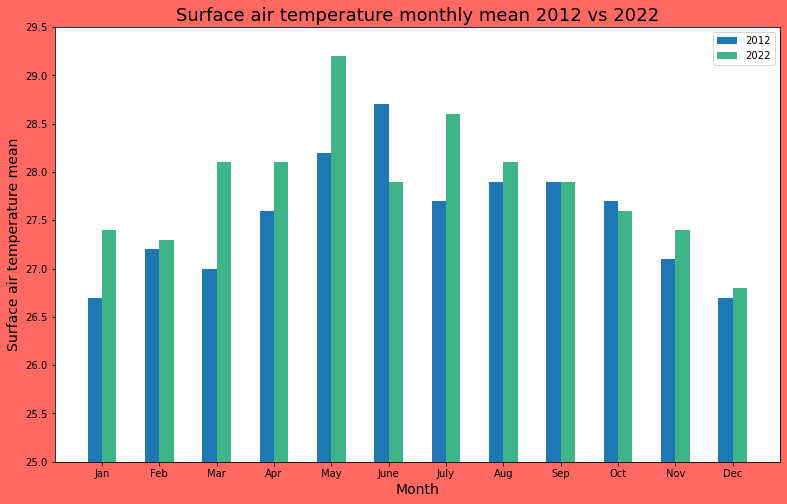

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# summary of data
datatsum = pd.read_csv("PDASdata/surface-air-temperature-monthly-mean.csv") #Just for summary
print("Summary of dataset\n")
print(f"{datat.info()}")
print(f"\nBefore cleaning:\nData span from the year {datatsum['month'][0]} to year {datatsum.iloc[-1]['month']}")
print(f"\nMean Temperature:\nMean:{datat['mean_temp'].mean():.2f}\
\nMedian:{datat['mean_temp'].median():.2f}\nQ1:{datat['mean_temp'].quantile(0.25):.2f}\
\nQ3:{datat['mean_temp'].quantile(0.75):.2f}\nMinimum:{datat['mean_temp'].min():.2f}\
\nMaximum:{datat['mean_temp'].max():.2f}\nStandard deviation:{datat['mean_temp'].std():.2f}")
print(f"\nNull values:\n{datat.isnull().sum()}")

# cleaning the data
datat.drop(datat[(datat['month'] <='2012')].index, inplace=True)
IQR = datat['mean_temp'].quantile(0.75)-datat['mean_temp'].quantile(0.25)
Q3 = datat['mean_temp'].quantile(0.75)
datat = datat[datat['mean_temp'] < Q3+1.5*IQR]
datat.to_csv("surface-air-temp-cleaned.csv",index=False)

# filtering the cleaned data
datacleanedsat = pd.read_csv("surface-air-temp-cleaned.csv")

datacleanedsat2012 = datacleanedsat.loc[datacleanedsat['month']<='2012-12-31']
datacleanedsat2022 = datacleanedsat.loc[datacleanedsat['month']>='2021-12-01']

plt.figure(figsize=(13,8),facecolor='#FF6961')
plt.bar(np.arange(12) - 0.125, datacleanedsat2012['mean_temp'], 0.25, label='2012')
plt.bar(np.arange(12)+ 0.125, datacleanedsat2022['mean_temp'], 0.25, label='2022',color='#3EB489')
plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.title("Surface air temperature monthly mean 2012 vs 2022",font={'size':18})
plt.xlabel("Month",font={'size':14})
plt.ylabel("Surface air temperature mean",font={'size':14})
plt.ylim(25,29.5)
plt.legend()

plt.show()

# 2. To find out the chagne in PSI and whether it is affected by rain (Part 1/2)
# Data description, wrangling, analysis
# Dataset: historical-24-hr-psi

Summary of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66770 entries, 0 to 67967
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   24-hr_psi  66770 non-null  object
 1   north      66770 non-null  int64 
 2   south      66770 non-null  int64 
 3   east       66770 non-null  int64 
 4   west       66770 non-null  int64 
 5   central    66770 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.6+ MB
None

Before cleaning:
Data span from the date 1/4/2014 1:00 to 1/1/2022 0:00

PSI of regions:	North	South	East	West	Central

Mean:		51.49	50.53	49.98	47.76	49.86
Median:		53.00	52.00	52.00	51.00	52.00
Q1:		44.00	43.00	42.00	38.00	42.00
Q3:		58.00	57.00	57.00	56.00	57.00
Minimum:	17.00	13.00	15.00	14.00	14.00
Maximum:	99.00	99.00	99.00	101.00	95.00
Standard dev:	10.82	11.75	11.33	13.35	11.23

Null values:
24-hr_psi    0
north        0
south        0
east         0
west         0
central      0
dtype: int6

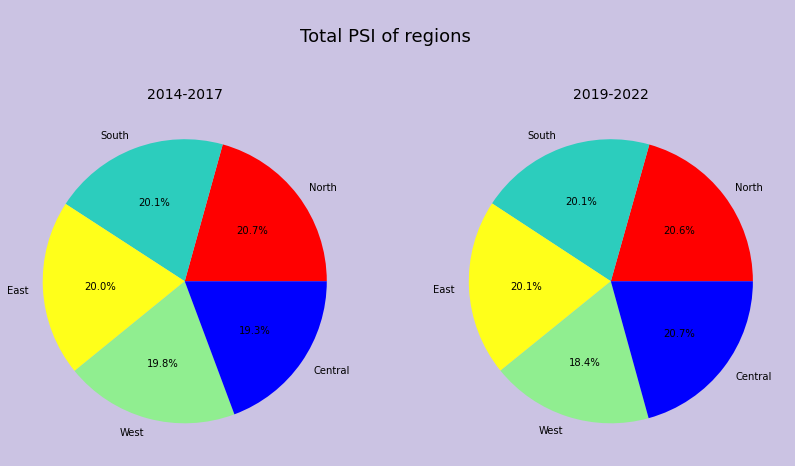

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

#summary of dataset
datapsum = pd.read_csv("PDASdata/historical-24-hr-psi.csv")
print("Summary of dataset\n")
print(f"{datap.info()}")
print(f"\nBefore cleaning:\nData span from the date {datapsum['24-hr_psi'][0]} to {datapsum.iloc[-1]['24-hr_psi']}")
print(f"\nPSI of regions:\tNorth\tSouth\tEast\tWest\tCentral\n\nMean:\t\t{datap['north'].mean():.2f}\t{datap['south'].mean():.2f}\
\t{datap['east'].mean():.2f}\t{datap['west'].mean():.2f}\t{datap['central'].mean():.2f}\nMedian:\t\t{datap['north'].median():.2f}\
\t{datap['south'].median():.2f}\t{datap['east'].median():.2f}\t{datap['west'].median():.2f}\t{datap['central'].median():.2f}\
\nQ1:\t\t{datap['north'].quantile(0.25):.2f}\t{datap['south'].quantile(0.25):.2f}\t{datap['east'].quantile(0.25):.2f}\t{datap['west'].quantile(0.25):.2f}\
\t{datap['central'].quantile(0.25):.2f}\nQ3:\t\t{datap['north'].quantile(0.75):.2f}\t{datap['south'].quantile(0.75):.2f}\
\t{datap['east'].quantile(0.75):.2f}\t{datap['west'].quantile(0.75):.2f}\t{datap['central'].quantile(0.75):.2f}\nMinimum:\t{datap['north'].min():.2f}\
\t{datap['south'].min():.2f}\t{datap['east'].min():.2f}\t{datap['west'].min():.2f}\t{datap['central'].min():.2f}\nMaximum:\t{datap['north'].max():.2f}\
\t{datap['south'].max():.2f}\t{datap['east'].max():.2f}\t{datap['west'].max():.2f}\t{datap['central'].max():.2f}\nStandard dev:\t{datap['north'].std():.2f}\
\t{datap['south'].std():.2f}\t{datap['east'].std():.2f}\t{datap['west'].std():.2f}\t{datap['central'].std():.2f}")
print(f"\nNull values:\n{datap.isnull().sum()}")

# cleaning the data
datap = datap[datap['north'] < datap['north'].quantile(0.75)+1.5* datap['north'].quantile(0.75)-datap['north'].quantile(0.25)]
datap = datap[datap['south'] < datap['south'].quantile(0.75)+1.5* datap['south'].quantile(0.75)-datap['south'].quantile(0.25)]
datap = datap[datap['east'] < datap['east'].quantile(0.75)+1.5* datap['east'].quantile(0.75)-datap['east'].quantile(0.25)]
datap = datap[datap['west'] < datap['west'].quantile(0.75)+1.5* datap['west'].quantile(0.75)-datap['west'].quantile(0.25)]
datap = datap[datap['central'] < datap['central'].quantile(0.75)+1.5* datap['central'].quantile(0.75)-datap['central'].quantile(0.25)]
datap.to_csv("24hrpsicleaned.csv")

# filtering the cleaned data
datapsi = pd.read_csv("24hrpsicleaned.csv",index_col=0)
datapsi['24-hr_psi'] = pd.to_datetime(datapsi['24-hr_psi'])
#get two period of 3years to compare
datapsi1417=datapsi[datapsi['24-hr_psi']<'2018']
datapsi1921=datapsi[(datapsi['24-hr_psi']>'2019')&(datapsi['24-hr_psi']<'2022')]
df1417=pd.DataFrame({'Region':['north','south','east','west','central'], 'PSI':[datapsi1417['north'].mean(),datapsi1417['south'].mean(),datapsi1417['east'].mean(),datapsi1417['west'].mean(),datapsi1417['central'].mean()]})
df1921=pd.DataFrame({'Region':['north','south','east','west','central'], 'PSI':[datapsi1921['north'].mean(),datapsi1921['south'].mean(),datapsi1921['east'].mean(),datapsi1921['west'].mean(),datapsi1921['central'].mean()]})

plt.figure(figsize=(14,8), facecolor='#CBC3E3')
plt.suptitle("\nTotal PSI of regions\n",fontsize=18)

labels=('North', 'South','East','West','Central')
colors=('r','#2CCDBD','#FFFF1A','lightgreen','b')

plt.subplot(121)
plt.title("2014-2017",font={'size':14})
plt.pie(df1417['PSI'],labels=labels,colors=colors,autopct='%1.1f%%')

plt.subplot(122)
plt.title("2019-2022",font={'size':14})
plt.pie(df1921['PSI'],labels=labels,colors=colors,autopct='%1.1f%%')

plt.show()

# 2. To find out the chagne in PSI and whether it is affected by rain (Part 2/2)
# Data description, wrangling, analysis
# Dataset: historical-24-hr-psi

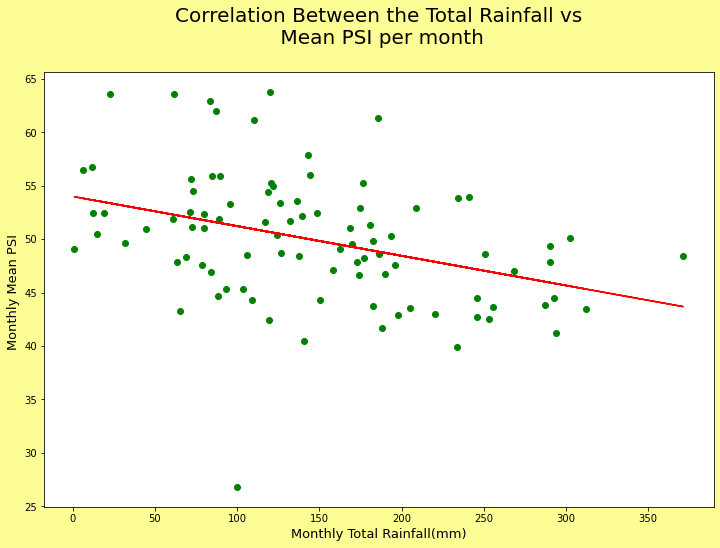

In [10]:
#Scatterplot rainfall vs psi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datacleanedr = pd.read_csv("rainfall-cleaned.csv")
datapsi = pd.read_csv("24hrpsicleaned.csv",index_col=0)

datapsi['month'] = pd.to_datetime(datapsi['24-hr_psi'])
datapsi = datapsi.set_index('month')
datapsi_daily = datapsi.resample('M').mean()
datapsi_daily.reset_index()

mean_values = datapsi_daily.mean(axis=1)
dfpsimean = pd.DataFrame({'month':datapsi_daily.index,'mean_psi':mean_values})
dfpsimean['month'] = dfpsimean['month'].dt.strftime('%Y-%m')
dfpsimean = dfpsimean.reset_index(drop=True)
datarain2014 = datacleanedr.loc[datacleanedr['month']>='2014-04']
df = pd.merge(dfpsimean,datarain2014, on='month')
df.dropna()


plt.figure(figsize=(12,8),facecolor='#FDFD96')
plt.title("Correlation Between the Total Rainfall vs\n Mean PSI per month\n", font={"size": 20})
plt.xlabel("Monthly Total Rainfall(mm)",font={"size": 13})
plt.ylabel("Monthly Mean PSI ",font={"size": 13})
plt.scatter(df['total_rainfall'],df['mean_psi'], color='g')
m,b = np.polyfit(df['total_rainfall'], df['mean_psi'], deg=1)
plt.plot(df['total_rainfall'], m*df['total_rainfall'] + b, 'r')

plt.show()